In [1]:
# Data manipulation and numerical operations
import pandas as pd
import numpy as np

# Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

# Data preprocessing and model evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import balanced_accuracy_score, accuracy_score

# Feature engineering
from sklearn.decomposition import PCA

# Additional utilities
import shap  # for explanations of model predictions


In [2]:
penske_df = pd.read_csv("DCM_DATA_LEHIGH.csv")


In [3]:
penske_df.head()

,ADJUSTED_SERVICE_DATE,ADJUSTED_SERVICE_DATE_FIRST,ANON_AREA_NAME,ANON_KMA,ANON_ORG_NAME,ANON_REGION_NAME,ANON_SSO,N_JOBS,N_WEEKEND_DAYS,N_WEEKS,...,AVG_OT_HRS_PCT_CHG,AVG_REG_HRS_PCT_CHG,AVG_REG_AMT_PCT_CHG,AVG_OT_HRS_PCT_AMT,AVG_SICK_HRS_PCT_CHG,AVG_CHECK_GROSS_PCT_CHG,START_STD,END_STD,START_HOUR_AVG,END_HOUR_AVG
0,2021-01-05,2021-01-05,AREA_NAME 1,KMA 1,ORG_NAME 1,REGION_NAME 1,TKAL97388736284318,1,2,5,...,1.272958,-0.002512,0.019770,1.291758,0.000677,0.231738,1.057994,3.080846,13.943224,21.966902
1,2021-01-05,2021-01-05,AREA_NAME 1,KMA 1,ORG_NAME 1,REGION_NAME 1,TKAL97388736284318,1,0,4,...,-0.736184,-0.048999,-0.045310,-0.705442,0.000525,-0.223577,0.141075,1.239555,14.395151,22.910692
2,2021-01-05,2021-01-05,AREA_NAME 1,KMA 1,ORG_NAME 1,REGION_NAME 1,TKAL97388736284318,1,0,5,...,0.197296,-0.111123,-0.113450,0.194231,1.000467,-0.031891,1.026001,1.178765,14.010556,22.901173
3,2021-01-05,2021-01-05,AREA_NAME 1,KMA 1,ORG_NAME 1,REGION_NAME 1,TKAL97388736284318,1,0,1,...,-0.922222,0.116716,0.114581,-0.908165,0.250609,-0.032410,0.041086,2.151920,14.453333,21.888884
4,2020-12-21,2020-12-21,AREA_NAME 1,KMA 1,ORG_NAME 1,REGION_NAME 1,EOTY95708433810417,1,0,1,...,0.048944,0.001558,-0.000922,0.091704,0.000659,0.001645,0.339502,1.500960,14.514683,22.440265


In [35]:
penske_df.keys()

Index(['ADJUSTED_SERVICE_DATE', 'ADJUSTED_SERVICE_DATE_FIRST',
       'ANON_AREA_NAME', 'ANON_KMA', 'ANON_ORG_NAME', 'ANON_REGION_NAME',
       'ANON_SSO', 'N_JOBS', 'N_WEEKEND_DAYS', 'N_WEEKS', 'STATUS',
       'VOLUNTARY_INVOLUNTARY', 'YEAR_MONTH', 'TOTAL_HOURS', 'WORKED_HOURS',
       'REG_HRS', 'REG_AMT', 'OT_HRS', 'OT_AMT', 'VACATION_HRS', 'SICK_HRS',
       'NON_WORKED_HRS', 'BONUS', 'INCENTIVE', 'SHIFT_DIFF', 'LEAD',
       'CHECK_GROSS', 'AVG_TOTAL_HOURS', 'AVG_WORKED_HOURS', 'AVG_REG_HRS',
       'AVG_REG_AMT', 'AVG_OT_HRS', 'AVG_OT_AMT', 'AVG_SICK_HRS',
       'AVG_CHECK_GROSS', 'AVG_N_WEEKEND_DAYS', 'TIP',
       'AVG_TOTAL_HOURS_PCT_CHG', 'AVG_WORKED_HOURS_PCT_CHG',
       'AVG_OT_HRS_PCT_CHG', 'AVG_REG_HRS_PCT_CHG', 'AVG_REG_AMT_PCT_CHG',
       'AVG_OT_HRS_PCT_AMT', 'AVG_SICK_HRS_PCT_CHG', 'AVG_CHECK_GROSS_PCT_CHG',
       'START_STD', 'END_STD', 'START_HOUR_AVG', 'END_HOUR_AVG'],
      dtype='object')

In [4]:
#DRop anon 
columns_to_remove = ['ADJUSTED_SERVICE_DATE', 'ADJUSTED_SERVICE_DATE_FIRST',"VOLUNTARY_INVOLUNTARY",'ANON_KMA', 'ANON_ORG_NAME', 'ANON_REGION_NAME']

# Removing the specified columns
penske_df.drop(columns=columns_to_remove, inplace=True)


In [5]:
penske_df.head()

,ANON_AREA_NAME,ANON_SSO,N_JOBS,N_WEEKEND_DAYS,N_WEEKS,STATUS,YEAR_MONTH,TOTAL_HOURS,WORKED_HOURS,REG_HRS,...,AVG_OT_HRS_PCT_CHG,AVG_REG_HRS_PCT_CHG,AVG_REG_AMT_PCT_CHG,AVG_OT_HRS_PCT_AMT,AVG_SICK_HRS_PCT_CHG,AVG_CHECK_GROSS_PCT_CHG,START_STD,END_STD,START_HOUR_AVG,END_HOUR_AVG
0,AREA_NAME 1,TKAL97388736284318,1,2,5,E,2021-05-01,250.819242,239.314058,196.946310,...,1.272958,-0.002512,0.019770,1.291758,0.000677,0.231738,1.057994,3.080846,13.943224,21.966902
1,AREA_NAME 1,TKAL97388736284318,1,0,4,E,2021-06-01,159.631212,157.138410,151.528653,...,-0.736184,-0.048999,-0.045310,-0.705442,0.000525,-0.223577,0.141075,1.239555,14.395151,22.910692
2,AREA_NAME 1,TKAL97388736284318,1,0,5,E,2021-07-01,199.089278,177.819251,165.140070,...,0.197296,-0.111123,-0.113450,0.194231,1.000467,-0.031891,1.026001,1.178765,14.010556,22.901173
3,AREA_NAME 1,TKAL97388736284318,1,0,1,T,2021-08-01,48.160857,43.402092,40.596722,...,-0.922222,0.116716,0.114581,-0.908165,0.250609,-0.032410,0.041086,2.151920,14.453333,21.888884
4,AREA_NAME 1,EOTY95708433810417,1,0,1,E,2021-01-01,22.870592,23.443393,20.577004,...,0.048944,0.001558,-0.000922,0.091704,0.000659,0.001645,0.339502,1.500960,14.514683,22.440265


In [6]:
penske_df.keys()

Index(['ANON_AREA_NAME', 'ANON_SSO', 'N_JOBS', 'N_WEEKEND_DAYS', 'N_WEEKS',
       'STATUS', 'YEAR_MONTH', 'TOTAL_HOURS', 'WORKED_HOURS', 'REG_HRS',
       'REG_AMT', 'OT_HRS', 'OT_AMT', 'VACATION_HRS', 'SICK_HRS',
       'NON_WORKED_HRS', 'BONUS', 'INCENTIVE', 'SHIFT_DIFF', 'LEAD',
       'CHECK_GROSS', 'AVG_TOTAL_HOURS', 'AVG_WORKED_HOURS', 'AVG_REG_HRS',
       'AVG_REG_AMT', 'AVG_OT_HRS', 'AVG_OT_AMT', 'AVG_SICK_HRS',
       'AVG_CHECK_GROSS', 'AVG_N_WEEKEND_DAYS', 'TIP',
       'AVG_TOTAL_HOURS_PCT_CHG', 'AVG_WORKED_HOURS_PCT_CHG',
       'AVG_OT_HRS_PCT_CHG', 'AVG_REG_HRS_PCT_CHG', 'AVG_REG_AMT_PCT_CHG',
       'AVG_OT_HRS_PCT_AMT', 'AVG_SICK_HRS_PCT_CHG', 'AVG_CHECK_GROSS_PCT_CHG',
       'START_STD', 'END_STD', 'START_HOUR_AVG', 'END_HOUR_AVG'],
      dtype='object')

In [7]:
penske_df["ANON_AREA_NAME"].unique()

array(['AREA_NAME 1', 'AREA_NAME 2', 'AREA_NAME 3', 'AREA_NAME 4',
       'AREA_NAME 5', 'AREA_NAME 6', 'AREA_NAME 7', 'AREA_NAME 8',
       'AREA_NAME 9', 'AREA_NAME 10', 'AREA_NAME 11', 'AREA_NAME 12',
       'AREA_NAME 13', 'AREA_NAME 14', 'AREA_NAME 15', 'AREA_NAME 16',
       'AREA_NAME 17', 'AREA_NAME 18'], dtype=object)

In [36]:

# Load data
penske_df = pd.read_csv("DCM_DATA_LEHIGH.csv")

# Drop unnecessary columns
columns_to_remove = ['ANON_SSO', 'ANON_AREA_NAME', 'ANON_KMA', 'ANON_ORG_NAME', 'ANON_REGION_NAME', 
                     'ADJUSTED_SERVICE_DATE', 'ADJUSTED_SERVICE_DATE_FIRST', 'TOTAL_HOURS', 'VOLUNTARY_INVOLUNTARY']
penske_df.drop(columns=columns_to_remove, inplace=True)

# Convert STATUS to binary
penske_df['STATUS'] = np.where(penske_df['STATUS'] == 'T', 1, 0)

# Defining features and target
X = penske_df.drop(['STATUS','YEAR_MONTH'], axis=1)
y = penske_df['STATUS']

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
algos =  GradientBoostingClassifier(), 
         XGBClassifier(), MLPClassifier(activation='relu', hidden_layer_sizes=(25, 5))]

# Iterate over algorithms, fit, and print performance
for algo in algos:
    algo.fit(X_train_scaled, y_train)
    y_test_pred = algo.predict(X_test_scaled)
    print(f"{type(algo).__name__}:")
    print(f"Accuracy: {accuracy_score(y_test, y_test_pred)}")
    print(f"Balanced Accuracy: {balanced_accuracy_score(y_test, y_test_pred)}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_test_pred)}\n")
    
    
    
    
xgb = XGBClassifier()
explainer = shap.Explainer(xgb.predict, X_test)
shap_values= explainer(X_test)


DecisionTreeClassifier:
Accuracy: 0.9185207328009566
Balanced Accuracy: 0.7109133307487262
Confusion Matrix:
[[20698   983]
 [  925   811]]

RandomForestClassifier:
Accuracy: 0.9476875774010335
Balanced Accuracy: 0.7144764379905786
Confusion Matrix:
[[21427   254]
 [  971   765]]

GradientBoostingClassifier:
Accuracy: 0.9467907930136226
Balanced Accuracy: 0.7206160621427966
Confusion Matrix:
[[21381   300]
 [  946   790]]

XGBClassifier:
Accuracy: 0.9476875774010335
Balanced Accuracy: 0.7372627198908683
Confusion Matrix:
[[21341   340]
 [  885   851]]



/Users/amelchristy/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression:
Accuracy: 0.9396165179143358
Balanced Accuracy: 0.6656050462115419
Confusion Matrix:
[[21406   275]
 [ 1139   597]]

MLPClassifier:
Accuracy: 0.9448691121834565
Balanced Accuracy: 0.7304415145499988
Confusion Matrix:
[[21295   386]
 [  905   831]]



 99%|===================| 23157/23417 [01:10<00:00]        

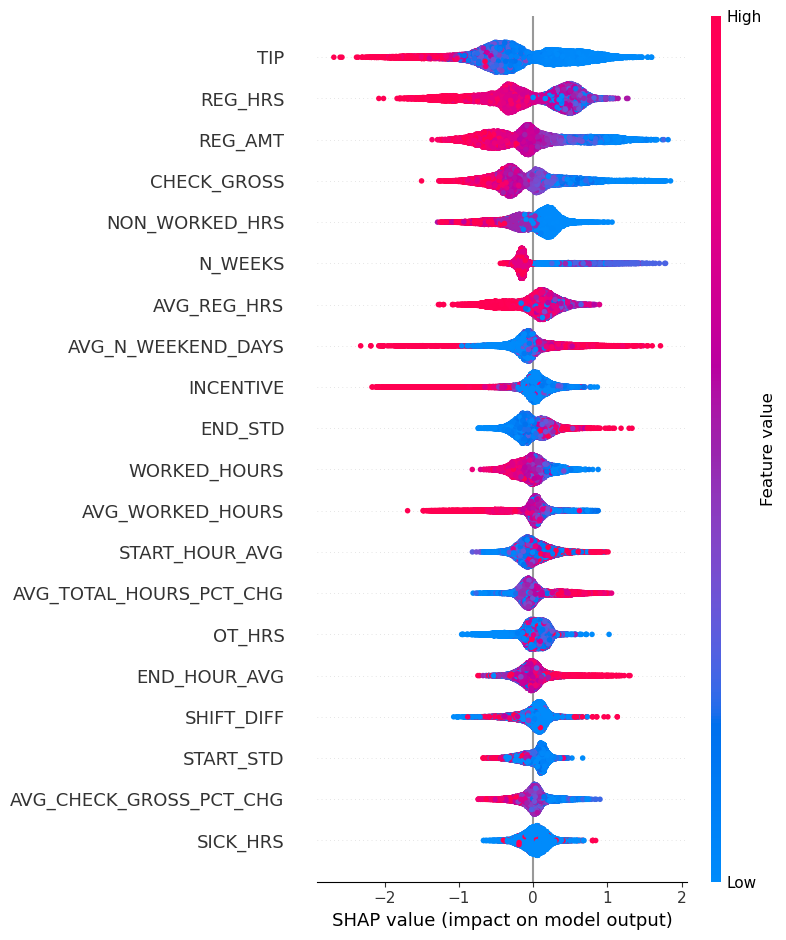

In [44]:
import shap
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

# Assuming X and y are your features and target variable
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Training the XGBClassifier with training data
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

# Creating the SHAP explainer using the trained model
# For tree-based models like XGBClassifier, it's more appropriate to use shap.TreeExplainer
explainer = shap.Explainer(xgb, X_test)

# Calculating SHAP values for the test set
shap_values = explainer(X_test)

# Now you can use SHAP values for various plots
# For example, a summary plot:
shap.summary_plot(shap_values, X_test)


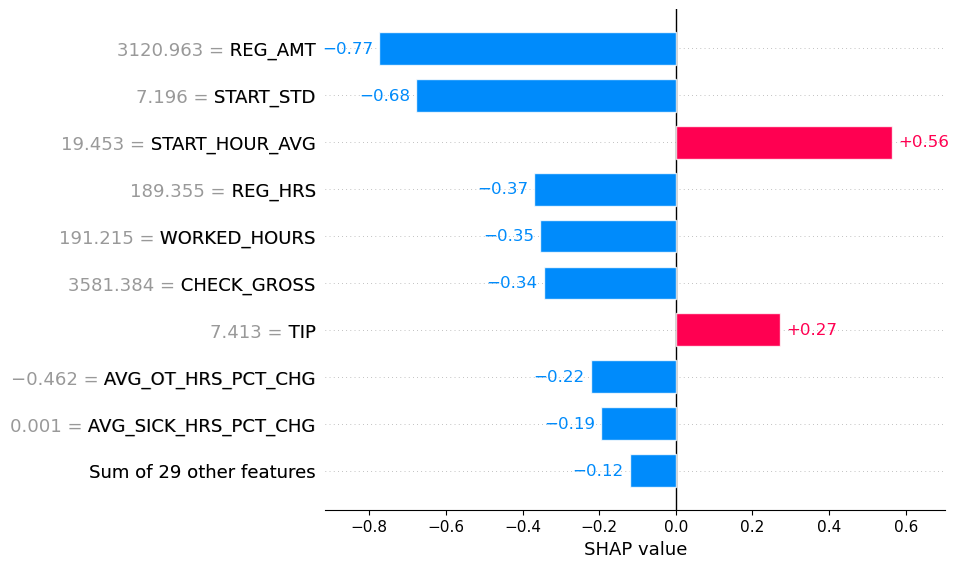

In [45]:
shap.plots.bar(shap_values[0])

In [47]:
penske_non_edited = pd.read_csv("DCM_DATA_LEHIGH.csv")

In [48]:
penske_non_edited.head()

,ADJUSTED_SERVICE_DATE,ADJUSTED_SERVICE_DATE_FIRST,ANON_AREA_NAME,ANON_KMA,ANON_ORG_NAME,ANON_REGION_NAME,ANON_SSO,N_JOBS,N_WEEKEND_DAYS,N_WEEKS,...,AVG_OT_HRS_PCT_CHG,AVG_REG_HRS_PCT_CHG,AVG_REG_AMT_PCT_CHG,AVG_OT_HRS_PCT_AMT,AVG_SICK_HRS_PCT_CHG,AVG_CHECK_GROSS_PCT_CHG,START_STD,END_STD,START_HOUR_AVG,END_HOUR_AVG
0,2021-01-05,2021-01-05,AREA_NAME 1,KMA 1,ORG_NAME 1,REGION_NAME 1,TKAL97388736284318,1,2,5,...,1.272958,-0.002512,0.019770,1.291758,0.000677,0.231738,1.057994,3.080846,13.943224,21.966902
1,2021-01-05,2021-01-05,AREA_NAME 1,KMA 1,ORG_NAME 1,REGION_NAME 1,TKAL97388736284318,1,0,4,...,-0.736184,-0.048999,-0.045310,-0.705442,0.000525,-0.223577,0.141075,1.239555,14.395151,22.910692
2,2021-01-05,2021-01-05,AREA_NAME 1,KMA 1,ORG_NAME 1,REGION_NAME 1,TKAL97388736284318,1,0,5,...,0.197296,-0.111123,-0.113450,0.194231,1.000467,-0.031891,1.026001,1.178765,14.010556,22.901173
3,2021-01-05,2021-01-05,AREA_NAME 1,KMA 1,ORG_NAME 1,REGION_NAME 1,TKAL97388736284318,1,0,1,...,-0.922222,0.116716,0.114581,-0.908165,0.250609,-0.032410,0.041086,2.151920,14.453333,21.888884
4,2020-12-21,2020-12-21,AREA_NAME 1,KMA 1,ORG_NAME 1,REGION_NAME 1,EOTY95708433810417,1,0,1,...,0.048944,0.001558,-0.000922,0.091704,0.000659,0.001645,0.339502,1.500960,14.514683,22.440265
